## **Linear Regression**


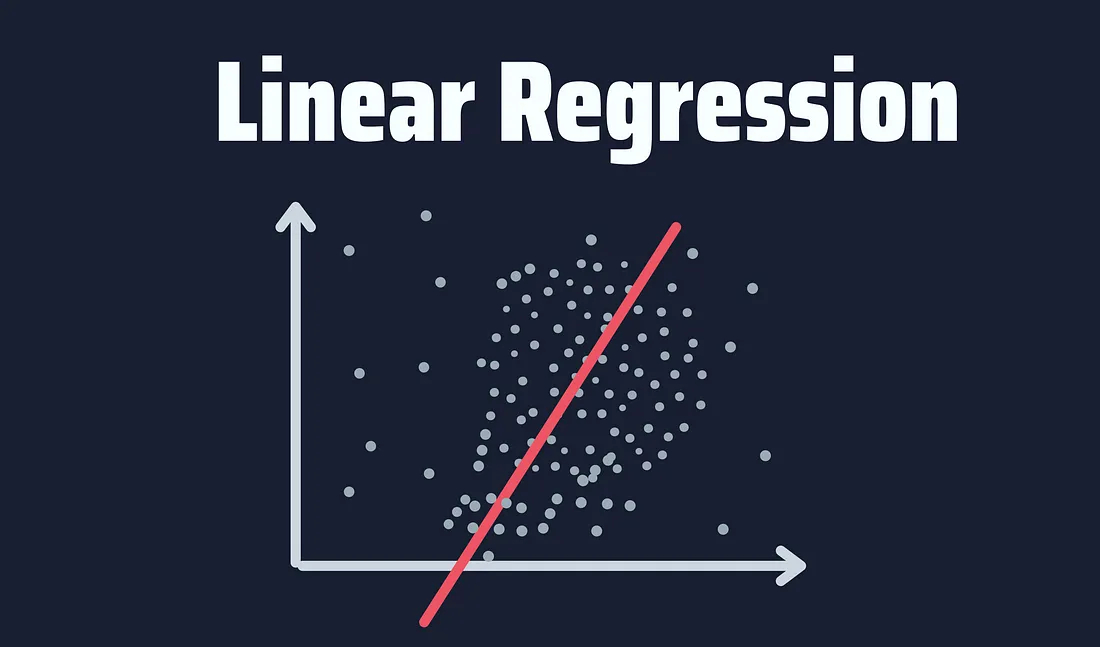

Given a data set $\left\{y_i, x_{i 1}, \ldots, x_{i p}\right\}_{i=1}^n$ of $n$ statistical units, a linear regression model assumes that the relationship between the dependent variable $y$ and the vector of regressors $\mathbf{x}$ is linear. This relationship is modeled through a disturbance term or error variable $\varepsilon$ - an unobserved random variable that adds "noise" to the linear relationship between the dependent variable and regressors. Thus the model takes the form
$$
y_i=\theta_0+\theta_1 x_{i 1}+\cdots+\theta_p x_{i p}+\varepsilon_i=\mathbf{x}_i^{\top} \boldsymbol{\theta}\ +{\theta_0} +\varepsilon_i, \quad i=\mathbf{1}, \ldots, n,
$$
where ${ }^{\top}$ denotes the transpose, so that $\mathbf{x}_i^{\top} \boldsymbol{\theta}$ is the inner product between vectors $\mathbf{x}_i$ and $\boldsymbol{\theta}$.
Often these $n$ equations are stacked together and written in matrix notation as
$$
\mathbf{y}=\mathbf{X}. \boldsymbol{\theta}+ {\theta_0} + \boldsymbol{\varepsilon}
$$
where
$$
\begin{aligned}
& \mathbf{y}=\left[\begin{array}{c}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{array}\right], \\
& \mathbf{X}=\left[\begin{array}{c}
\mathbf{x}_1^{\top} \\
\mathbf{x}_2^{\top} \\
\vdots \\
\mathbf{x}_n^{\top}
\end{array}\right]=\left[\begin{array}{cccc}
x_{11} & \cdots & x_{1 p} \\
x_{21} & \cdots & x_{2 p} \\
\vdots & \vdots & \vdots \\
x_{n \mathbf{1}} & \cdots & x_{n p}
\end{array}\right], \\
& \boldsymbol{\theta}=\left[\begin{array}{c}
\theta_1 \\
\theta_2 \\
\vdots \\
\theta_p
\end{array}\right], \quad \varepsilon=\left[\begin{array}{ccc}
\varepsilon_1 \\
\varepsilon_2 \\
\vdots \\
\varepsilon_n
\end{array}\right] .
\end{aligned}
$$

$$\
Cost\ Function,\ \ J\ =  \ \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) – y^{(i)})^2$$

## **Steps Required in Gradient Descent Algorithm**
- **Step 1:** we first initialize the parameters of the model randomly
- **Step 2:** Compute the gradient of the cost function with respect to each parameter. It involves making partial differentiation of cost function with respect to the parameters.
- **Step 3:** Update the parameters of the model by taking steps in the opposite direction of the model. Here we choose a hyperparameter learning rate which is denoted by alpha. It helps in deciding the step size of the gradient.
- **Step 4:** Repeat steps 2 and 3 iteratively to get the best parameter for the defined model

Gradient Descent
$$
\theta_j=\theta_j-\alpha \frac{\partial}{\partial \theta_j} J\left(\theta_0, \theta_1, \theta_2..., \theta_p\right)
$$

$$where\ \alpha  \ =  \ Learning\ Rate$$\
Now,
$$
\begin{aligned}
\frac{\partial}{\partial \theta} J_{\theta} & =\frac{\partial}{\partial \theta} \frac{1}{2 n} \sum_{i=1}^n\left[h_{\theta}\left(x^{(i)}\right)-y\right]^2 \\
& =\frac{1}{n} \sum_{i=1}^n\left(h_{\theta}\left(x^i\right)-y\right) \frac{\partial}{\partial \theta_j}\left(\theta^T. x^{(i)} + \theta_0 -y\right)\
\end{aligned}
$$

\begin{aligned}
\frac{\partial}{\partial \theta_j} J_{\theta} =\frac{1}{n}\sum_{i=1}^n\left(h_{\theta}\left(x^{(i)}\right)-y\right) x^{(i)}_j, \ \ \ \ \ \ \ \ \ \ \ \theta_j = \theta_1, \ \theta_2, \theta_3,..., \theta_p
\end{aligned}

\begin{aligned}
\frac{\partial}{\partial \theta_0} J_{\theta} =\frac{1}{n}\sum_{i=1}^n\left(h_{\theta}\left(x^{(i)}\right)-y\right), \ \ \ \ \ \ \ \ \ \ \ \theta_j = \theta_0
\end{aligned}

#### **So, the finally update step becomes:**
\begin{aligned}
\theta_j=\theta_j-\alpha\frac{1}{n}\sum_{i=1}^n\left(h_{\theta}\left(x^{(i)}\right)-y\right)x^{(i)}_j
\end{aligned}

\begin{aligned}
\theta_0=\theta_0-\alpha\frac{1}{n}\sum_{i=1}^n\left(h_{\theta}\left(x^{(i)}\right)-y\right)
\end{aligned}



In [ ]:
class LinearRegression:

  def __init__(self, fit_intercept = True):
    self.fit_intercept = fit_intercept


  def fit(self, X, y, epochs = 1000):
    import numpy as np
    import pandas as pd
    n, d = X.shape
    w = np.random.rand(d)
    if self.fit_intercept:
      w = np.append(w, 1)
      ones = np.ones(shape = (n, 1))
      X = np.hstack((X, ones))

    for i in range(epochs):
      y_pred = np.dot(X, w)
      err = y_pred - y
      gradient = 2 * np.dot(X.T, err)
      w -=  0.001 * gradient

    if self.fit_intercept:
      self.coef_ = w[:-1]
      self.intercept_ = w[-1]
    else:
      self.coef_ = w
      self.intercept_ = 0


  def predict(self, X):
    import numpy as np
    import pandas as pd
    if 'coef_' not in dir(self):
      raise Exception('The model has been fit on the data yet')
    return np.dot(X, self.coef_) + self.intercept_

  def fit_predict(self, X):
    import numpy as np
    import pandas as pd
    self.fit(X)
    return self.predict(X)

  def score(self, X, y):
    import numpy as np
    import pandas as pd
    if 'coef_' not in dir(self):
      raise Exception('The model has been fit on the data yet')

    y_pred = self.predict(X)
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y_pred - y_pred.mean()) ** 2)
    r2_score = 1 - rss/tss
    return r2_score